<a href="https://colab.research.google.com/github/yvonwin/jupyter-notebooks/blob/main/fastai_timm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install timm
# or
# git clone https://github.com/rwightman/pytorch-image-models
# cd pytorch-image-models && pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# create model
import timm 
import torch

model = timm.create_model('resnet34')
x     = torch.randn(1, 3, 224, 224)
model(x).shape

torch.Size([1, 1000])

In [3]:
pretrained_resnet_34 = timm.create_model('resnet34', pretrained=True)

In [4]:
import timm 
import torch

model = timm.create_model('resnet34', num_classes=10)
x     = torch.randn(1, 3, 224, 224)
model(x).shape

torch.Size([1, 10])

In [5]:
avail_pretrained_models = timm.list_models(pretrained=True)
len(avail_pretrained_models), avail_pretrained_models[:5]

(592,
 ['adv_inception_v3',
  'bat_resnext26ts',
  'beit_base_patch16_224',
  'beit_base_patch16_224_in22k',
  'beit_base_patch16_384'])

In [6]:
all_densenet_models = timm.list_models('*efficient*')
all_densenet_models

['efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',
 'efficientnet_cc_b0_4e',
 'efficientnet_cc_b0_8e',
 'efficientnet_cc_b1_8e',
 'efficientnet_el',
 'efficientnet_el_pruned',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_es_pruned',
 'efficientnet_l2',
 'efficientnet_lite0',
 'efficientnet_lite1',
 'efficientnet_lite2',
 'efficientnet_lite3',
 'efficientnet_lite4',
 'efficientnetv2_l',
 'efficientnetv2_m',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t',
 'efficientnetv2_s',
 'efficientnetv2_xl',
 'gc_efficientnetv2_rw_t',
 'tf_efficientnet_b0',
 'tf_efficientnet_b0_ap',
 'tf_efficientnet_b0_ns',
 'tf_efficientnet_b1',
 'tf_efficientnet_b1_ap',
 'tf_efficientnet_b1_ns',
 'tf_efficientnet_b2',
 'tf_efficien

In [7]:
all_densenet_models = timm.list_models('*swin*')
all_densenet_models

['swin_base_patch4_window7_224',
 'swin_base_patch4_window7_224_in22k',
 'swin_base_patch4_window12_384',
 'swin_base_patch4_window12_384_in22k',
 'swin_large_patch4_window7_224',
 'swin_large_patch4_window7_224_in22k',
 'swin_large_patch4_window12_384',
 'swin_large_patch4_window12_384_in22k',
 'swin_small_patch4_window7_224',
 'swin_tiny_patch4_window7_224']

In [8]:
# # fast ai learn
# from fastai.vision.all import *

# path = untar_data(URLs.PETS)/'images'
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2,
#     label_func=lambda x: x[0].isupper(), item_tfms=Resize(224))
    
# # if a string is passed into the model argument, it will now use timm (if it is installed)
# # learn = vision_learner(dls, 'vit_tiny_patch16_224', metrics=error_rate)
# learn = vision_learner(dls, 'swin_tiny_patch4_window7_224', metrics=error_rate)
# learn.fine_tune(1)

In [10]:
!nvidia-smi
# # del learn
# torch.cuda.empty_cache()

Mon Jun 20 04:07:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


SuggestedLRs(valley=0.0008317637839354575)

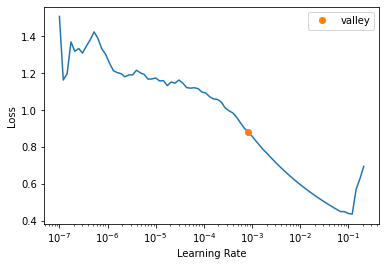

In [11]:
# fast ai learn
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=lambda x: x[0].isupper(), item_tfms=Resize(224),bs=16)
    
# if a string is passed into the model argument, it will now use timm (if it is installed)
# learn = vision_learner(dls, 'vit_tiny_patch16_224', metrics=error_rate)
learn = vision_learner(dls, 'swin_large_patch4_window7_224_in22k', metrics=error_rate)
learn.lr_find()
# learn.fine_tune(1)

In [ ]:
learn.lr_find()